# Gaussian Bayes classifier

In [145]:
%matplotlib inline
#bibliotecas

from sklearn.datasets import make_blobs, make_moons, make_regression, load_iris
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Carregando Bancos de dados


In [156]:
dados = pd.read_csv("banco-Copy1.csv") #, sep=',' #tirar o espaço antes do pd
dados = np.array(dados)
print(dados)
#print(dados[0][0])

#pd.DataFrame(dados)


[['GRASS' 110.0 189.0 ... 18.666667999999998 0.50813884 1.9108642]
 ['GRASS' 86.0 187.0 ... 19.222220999999998 0.46332908 1.9414648999999997]
 ['GRASS' 225.0 244.0 ... 17.11111 0.48014903 1.9879022000000002]
 ...
 ['CEMENT' 128.0 161.0 ... 10.888889 0.5409177 -1.9963073]
 ['CEMENT' 150.0 158.0 ... 12.222222 0.50308645 -1.9434487]
 ['CEMENT' 124.0 162.0 ... 14.555554999999998 0.4799313 -2.0293121]]


In [157]:
#A dimensão dos dados
dados.shape

(2100, 20)

# Estatísticas descritivas dos dados


In [158]:
dados = pd.read_csv("banco1.csv")
dados.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,2100.000000,2100.000000,2100.0,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,124.940476,123.483333,9.0,0.014921,0.004550,1.890820,5.708299,2.406772,7.904224e+00,37.047654,32.806667,44.205556,34.130741,-12.722963,21.473704,-8.750741,45.162381,0.879188,-1.365147
std,72.858637,57.431428,0.0,0.041024,0.023573,2.649453,44.989359,3.469954,5.347107e+01,38.135291,34.994538,43.510119,36.303768,11.588214,19.654107,11.606996,42.900582,14.643927,1.544278
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.589457e-08,0.000000,0.000000,0.000000,0.000000,-49.666668,-12.444445,-33.888890,0.000000,0.000000,-3.044175
25%,62.000000,81.000000,9.0,0.000000,0.000000,0.722222,0.349603,0.833332,4.216377e-01,7.472222,7.000000,9.666667,6.222222,-18.583333,4.305556,-17.000000,11.777778,0.284934,-2.188539
50%,121.000000,122.000000,9.0,0.000000,0.000000,1.277776,0.833333,1.444444,9.897442e-01,21.666666,19.666668,27.777779,20.444445,-10.888889,19.666666,-11.000000,28.666666,0.375064,-2.052625
75%,188.250000,171.250000,9.0,0.000000,0.000000,2.222221,1.807406,2.555556,2.251852e+00,53.277778,47.333332,65.000000,46.388888,-4.222222,36.111110,-3.222222,65.000000,0.541005,-1.565745
max,254.000000,251.000000,9.0,0.333333,0.222222,29.222221,991.718400,44.722225,1.386329e+03,143.444440,137.111110,150.888890,142.555560,9.888889,82.000000,24.666666,150.888890,475.000000,2.912480


# Classificador Bayesiano Gaussian

In [159]:

class BayesClassifier:
    
    mu = None
    cov = None
    n_classes = None
    
    def __init__(self):
        a = None
    
    def pred(self,x):
        prob_vect = np.zeros(self.n_classes)
        
        for i in range(self.n_classes):
            
            
            mnormal = multivariate_normal(mean=bc.mu[i], cov=bc.cov[i])
            
            # We use uniform priors
            prior = 1./self.n_classes
            
            prob_vect[i] = prior*mnormal.pdf(x)
            sumatory = 0.
            for j in range(self.n_classes):
                mnormal = multivariate_normal(mean=bc.mu[j], cov=bc.cov[j])
                sumatory += prior*mnormal.pdf(x)
            prob_vect[i] = prob_vect[i]/sumatory
        return prob_vect
        
    def fit(self, X,y):
        self.mu = []
        self.cov = []
        
        self.n_classes = np.max(y)+1
        
        for i in range(self.n_classes):
            Xc = X[y==i]
            
            mu_c = np.mean(Xc, axis=0)
            self.mu.append(mu_c)
            
            cov_c = np.zeros((X.shape[1], X.shape[1]))
            for j in range( Xc.shape[0]):
                a = Xc[j].reshape((X.shape[1],1))
                b = Xc[j].reshape((1,X.shape[1]))
                cov_ci = np.multiply(a, b)
                cov_c = cov_c+cov_ci
            cov_c = cov_c/float(X.shape[0])
            self.cov.append(cov_c)
        self.mu = np.asarray(self.mu)
        self.cov = np.asarray(self.cov)

In [160]:
# Fit the classifier on the two-feature dataset

bc = BayesClassifier()

#dados = pd.read_csv("banco.csv")
#dados = np.array(dados)

#dados sem as classes
#classes dos dados
X = dados[0:2100, 1:20]
Y = dados[0:2100, 0]

#type(X[0][9])

TypeError: unhashable type: 'slice'

(2100, 8)
(2100,)


ValueError: c of shape (2100,) not acceptable as a color sequence for x with size 2100, y with size 2100

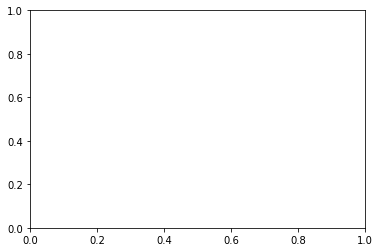

In [161]:
#Grafico
print (X.shape)
print (Y.shape)
plt.scatter(X[:,0],X[:,1], c=Y) #usei os mesmos argumentos dos dados de iris, mas não consigo ver as 7 classes

In [126]:

X = dados[0:2100, 1:9] # pq qd eu aumento o número de variaves está dando erro
Y = dados[0:2100, 0]

X_test = dados[0:1800, 1:9]
y_test = dados[0:1800, 0]

#X = np.asarray(X, dtype=float)

bc.fit(X, Y)

TypeError: unhashable type: 'slice'

In [127]:
hit = 0.

for i in range(X_test.shape[0]):
    ypred = bc.pred(X_test[i])
    if np.argmax(ypred) == y_test[i]:
        hit += 1

print ("Classification Gaussian bayes score: "+str(hit/X_test.shape[0]))


TypeError: 'NoneType' object cannot be interpreted as an integer